In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

sys.path.append('../')
from model import Model
from image_generation import generate_block
from scipy import signal, ndimage, interpolate 
from copy import deepcopy
from utils import extract_window, gaussian_kernel

from functools import partial
import cProfile
from pathlib import Path
np.set_printoptions(precision=4)

<IPython.core.display.Javascript object>


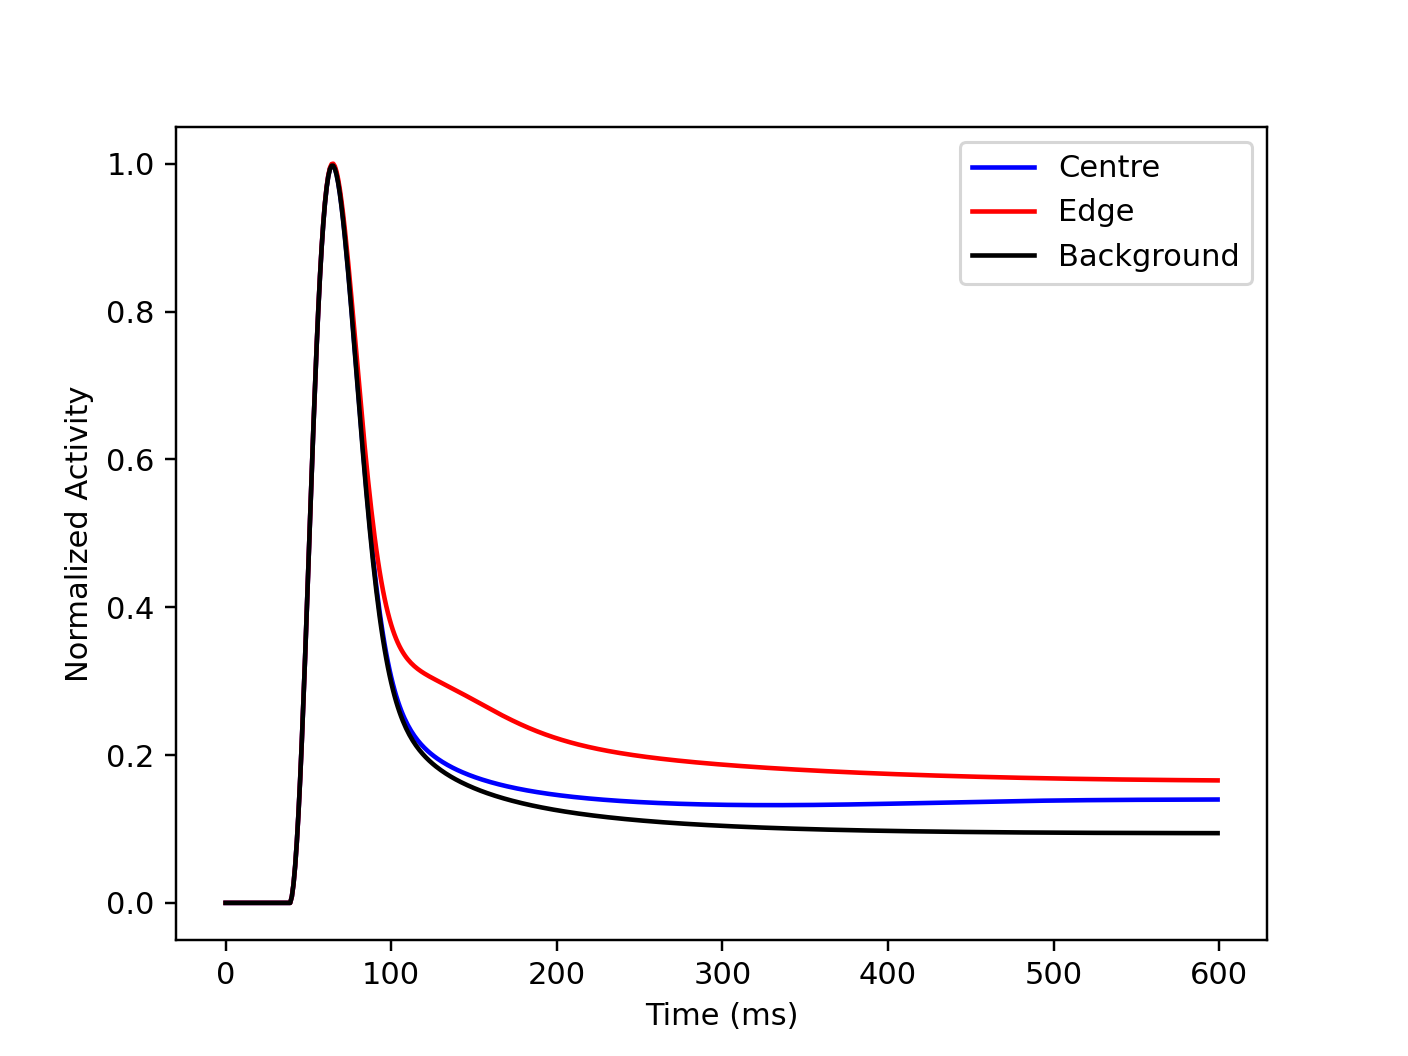

In [12]:
%matplotlib notebook

V1 = pd.read_csv("poort_results/v1.csv")
V4 = pd.read_csv("poort_results/v4.csv")


# maxV1 = np.amax([V1['bck'], V1['cen'], V1['brd']])
plt.plot(np.arange(0,600), V1['cen'][200:] , 'b', label="Centre")
plt.plot(np.arange(0,600), V1['brd'][200:] , 'r', label="Edge")
plt.plot(np.arange(0,600), V1['bck'][200:] , 'k', label="Background")
plt.ylabel("Normalized Activity")
plt.xlabel("Time (ms)")
plt.legend()

<IPython.core.display.Javascript object>


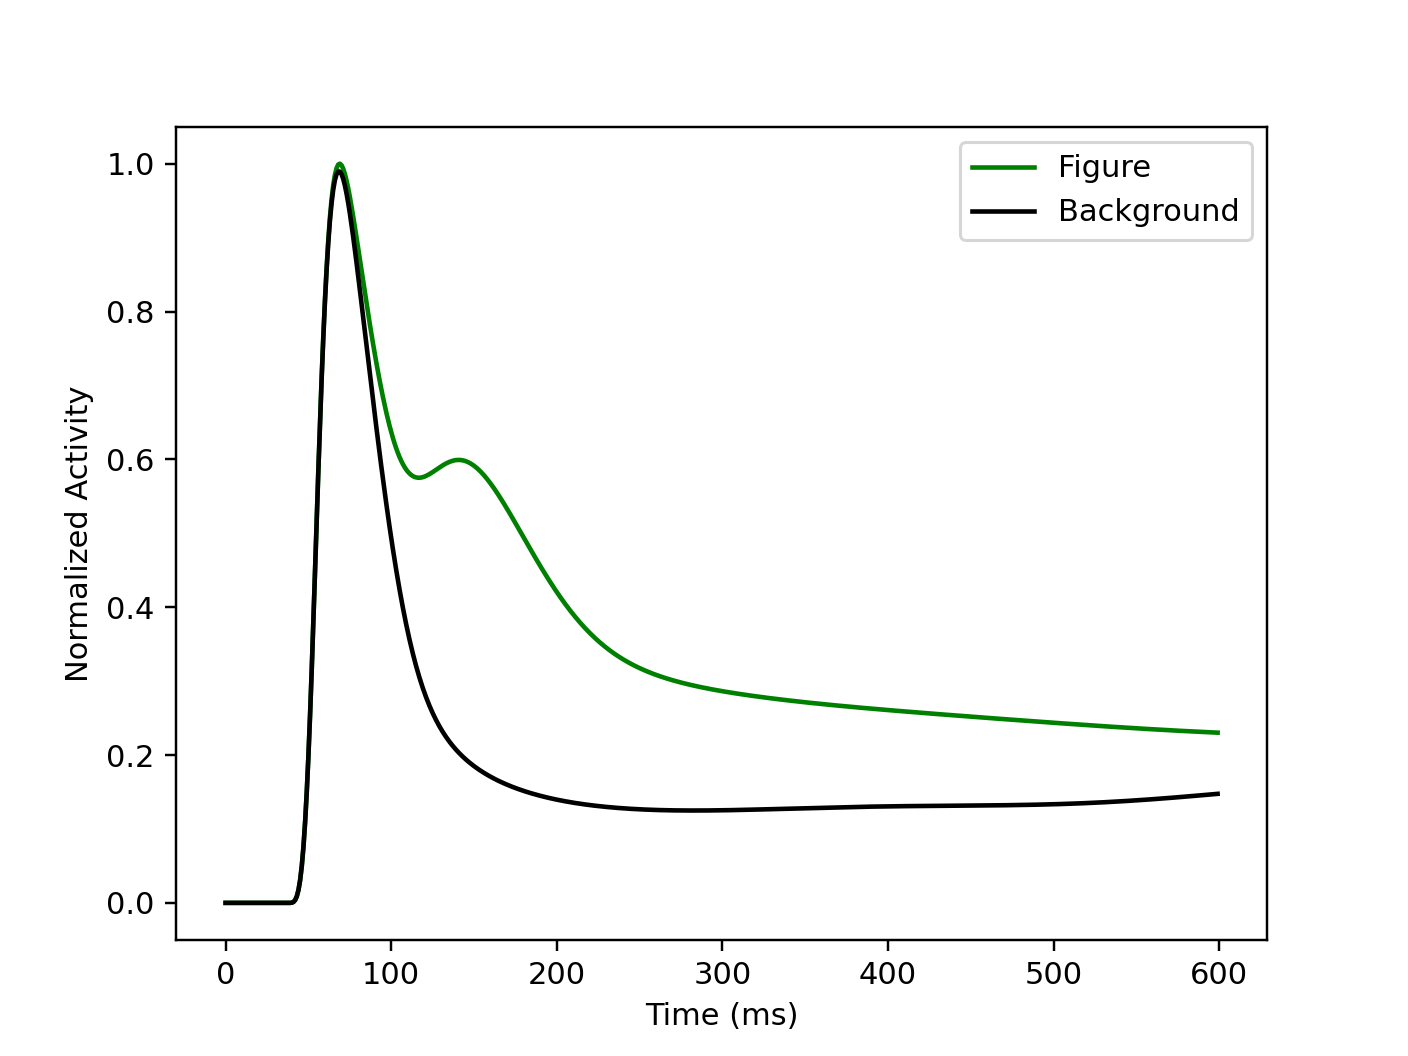

In [11]:
plt.plot(np.arange(0,600), V4['cen'][200:] , 'g', label="Figure")
plt.plot(np.arange(0,600), V4['bck'][200:] , 'k', label="Background")
plt.ylabel("Normalized Activity")
plt.xlabel("Time (ms)")
plt.legend()

In [14]:
parm_df = pd.read_csv("../parameters.csv", index_col=0)
na = generate_image()
model = Model()

array([[-1.    , -0.9833, -0.9667, ...,  0.9667,  0.9833,  1.    ],
       [-1.    , -0.9833, -0.9667, ...,  0.9667,  0.9833,  1.    ],
       [-1.    , -0.9833, -0.9667, ...,  0.9667,  0.9833,  1.    ],
       ...,
       [-1.    , -0.9833, -0.9667, ...,  0.9667,  0.9833,  1.    ],
       [-1.    , -0.9833, -0.9667, ...,  0.9667,  0.9833,  1.    ],
       [-1.    , -0.9833, -0.9667, ...,  0.9667,  0.9833,  1.    ]])

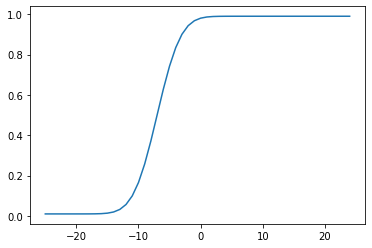

In [3]:
from scipy import stats

x = np.arange(-25,25)
mean = -7
sd = 3
lapse = 0.01

plt.plot(x, lapse + (1 - 2*lapse)*stats.norm.cdf(x,mean,sd))


array([[0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528],
       [0.13533528, 0.13533528]], dtype=float32)

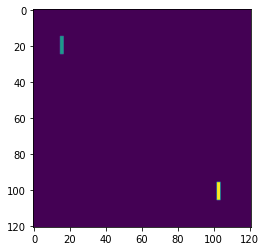

In [3]:
na = generate_block()
na = np.full_like(na, 90)
na[15:25, 15:17] = 60
na[96:106, 102:104] = 30
sigma = 30
mu = 30
hg = np.exp(-((na-mu) ** 2) / (2 * sigma ** 2))
# hg = ndimage.gaussian_filter(hg, sigma)
# hg2 = np.exp(-((na-mu) ** 2) / (2 * sigma ** 2))
plt.imshow(hg)
# plt.plot(hg)
# np.exp(-((30-mu) ** 2) / (2 * sigma ** 2))
hg[0:15, 15:17]

Initialized model with 3 features.
V1 has dims (121, 121)
V2 has dims (60, 60)
V4 has dims (15, 15)
5.0


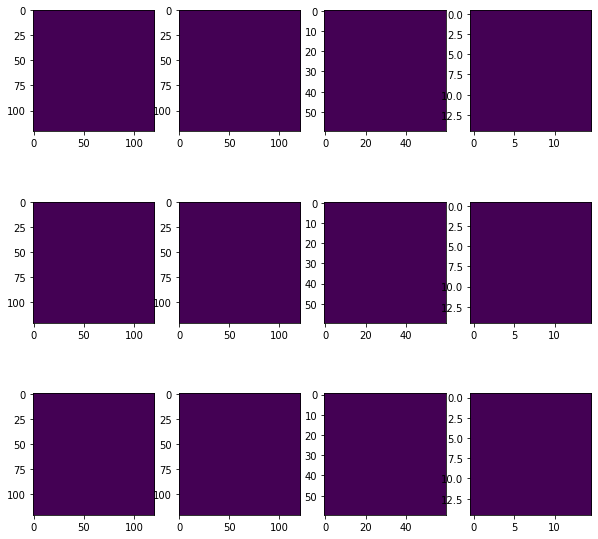

In [48]:
parm_df = pd.read_csv("../parameters.csv", index_col=0)
model = Model(parm_df, features=[30, 60, 90])

na = generate_block()
na = np.full_like(na, 90)
na[15:25, 15:17] = 60
na[96:106, 102:104] = 30
# na = np.zeros_like(na)
# inds = np.diag_indices(na.shape[0])[0][int(na.shape[0]/2.1): int(-na.shape[0]/2.1)]
# na[inds,inds] = 1

fig, axs = plt.subplots(3,4, figsize=(10,10))
LGN = {}
V1 = {}
V2 = {}
V4 = {}
for f in range(len(model.features)):
    # Each dictionary value should be a list of results where a result is a numpy array
    LGN[f] = [deepcopy(model.LGN[f].V)]
    V1[f] = [deepcopy(model.V1[f].V)]
    V2[f] = [deepcopy(model.V2[f].V)]
    V4[f] = [deepcopy(model.V4[f].V)]

LGN["mean"] = [np.mean( np.array([ model.LGN[f].V for f in range(len(model.features))]), axis=0 )]
V1["mean"] = [np.mean( np.array([ model.V1[f].V for f in range(len(model.features)) ]), axis=0 )]
V2["mean"] = [np.mean( np.array([ model.V2[f].V for f in range(len(model.features)) ]), axis=0 )]
V4["mean"] = [np.mean( np.array([ model.V4[f].V for f in range(len(model.features)) ]), axis=0 )]

LGN["sum"] = [np.sum( np.array([ model.LGN[f].V for f in range(len(model.features)) ]), axis=0 )]
V1["sum"] = [np.sum( np.array([ model.V1[f].V for f in range(len(model.features)) ]), axis=0 )]
V2["sum"] = [np.sum( np.array([ model.V2[f].V for f in range(len(model.features)) ]), axis=0 )]
V4["sum"] = [np.sum( np.array([ model.V4[f].V for f in range(len(model.features)) ]), axis=0 )]

axs[0,0].imshow(LGN[0][0])
axs[0,1].imshow(V1[0][0])
axs[0,2].imshow(V2[0][0])
axs[0,3].imshow(V4[0][0])
axs[1,0].imshow(LGN[1][0])
axs[1,1].imshow(V1[1][0])
axs[1,2].imshow(V2[1][0])
axs[1,3].imshow(V4[1][0])
axs[2,0].imshow(LGN["mean"][0])
axs[2,1].imshow(V1["mean"][0])
axs[2,2].imshow(V2["mean"][0])
axs[2,3].imshow(V4["mean"][0])
fig.tight_layout = True
print(model.parameters["V4"]["plus_supp"])

In [46]:
121-17

104

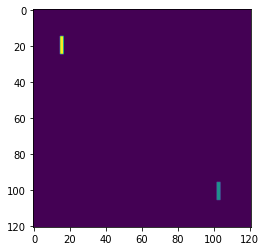

In [47]:
fig = np.zeros_like(na)
fig[15:25, 15:17] = 60
fig[96:106, 102:104] = 30
plt.imshow(fig)
# inds


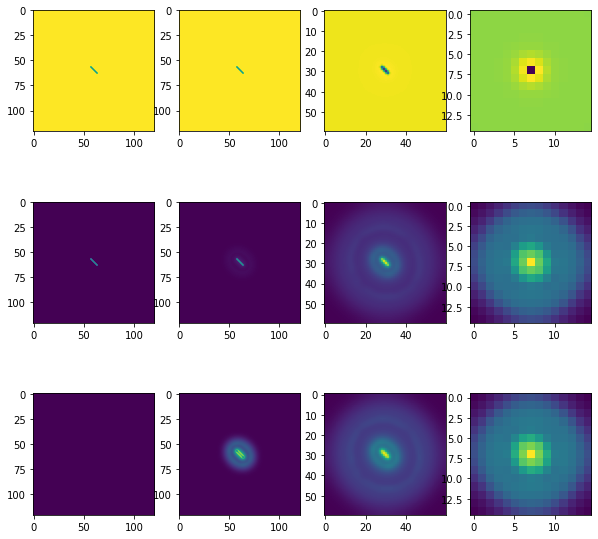

In [53]:
n = 600
for i in range(n):
    model.update(na, 0.01)
    for f in range(len(model.features)):
        # For each dictionary value (which is a list) append the next result
        preprocessing[f].append(deepcopy(model.LGN[f].V))
        V1[f].append(deepcopy(model.V1[f].V))
        V2[f].append(deepcopy(model.V2[f].V))
        V4[f].append(deepcopy(model.V4[f].V))
    preprocessing["mean"].append(np.mean( np.array([ model.LGN[f].V for f in range(len(model.features)) ]), axis=0 ))
    V1["mean"].append(np.mean( np.array([ model.V1[f].V for f in range(len(model.features)) ]), axis=0 ))
    V2["mean"].append(np.mean( np.array([ model.V2[f].V for f in range(len(model.features)) ]), axis=0 ))
    V4["mean"].append(np.mean( np.array([ model.V4[f].V for f in range(len(model.features)) ]), axis=0 ))
    preprocessing["sum"].append(np.sum( np.array([ model.LGN[f].V for f in range(len(model.features)) ]), axis=0 ))
    V1["sum"].append(np.sum( np.array([ model.V1[f].V for f in range(len(model.features)) ]), axis=0 ))
    V2["sum"].append(np.sum( np.array([ model.V2[f].V for f in range(len(model.features)) ]), axis=0 ))
    V4["sum"].append(np.sum( np.array([ model.V4[f].V for f in range(len(model.features)) ]), axis=0 ))


f, axs = plt.subplots(3,4, figsize=(10,10))
axs[0,0].imshow(preprocessing[0][n])
axs[0,1].imshow(V1[0][n])
axs[0,2].imshow(V2[0][n])
axs[0,3].imshow(V4[0][n])
axs[1,0].imshow(preprocessing[1][n])
axs[1,1].imshow(V1[1][n])
axs[1,2].imshow(V2[1][n])
axs[1,3].imshow(V4[1][n])
axs[2,0].imshow(preprocessing["mean"][n])
axs[2,1].imshow(V1["mean"][n])
axs[2,2].imshow(V2["mean"][n])
axs[2,3].imshow(V4["mean"][n])
fig.tight_layout = True

In [66]:
mean_activity_v1 = model.V1_trace
mean_activity_v4 = model.V4_trace
maxV1 = np.max(mean_activity_v1)
maxV4 = np.max(mean_activity_v4)
mean_activity_v1 /= maxV1
mean_activity_v4 /= maxV4

slice_activity_v1 = model.V1_slice / maxV1
slice_activity_v4 = model.V4_slice / maxV4

offsetRfV1 = int(model.V1[0].input_dim / 6)
offsetRfV4 = int(model.V4[0].input_dim / 6)

AttributeError: 'Model' object has no attribute 'V1_trace'

In [56]:
def norm(x):
    print(np.max(x))
    return x / np.max(x)
#     return (x-np.min(x)) / (np.max(x) - np.min(x))


def extract_portions(activity, x_min, x_max, y_min, y_max):
    center = activity[:,x_min:x_max,y_min:y_max]
    
    bg1 = activity[:,:x_min,:]
    bg2 = activity[:,x_max:,:]
    bg3 = activity[:,x_min:x_max,:y_min]
    bg4 = activity[:,x_min:x_max,y_max:]
    background = [bg1,bg2,bg3,bg4]
    
    edge1 = activity[:,x_min-1:x_min,y_min:y_max]
    edge2 = activity[:,x_max:x_max+1,y_min:y_max]
    edge3 = activity[:,x_min:x_max,y_min-1:y_min]
    edge4 = activity[:,x_min:x_max,y_max-1:y_max]
    edges = [edge1, edge2, edge3, edge4]
    return center, background, edges
    

2.7176459051066
1.5558477438974976


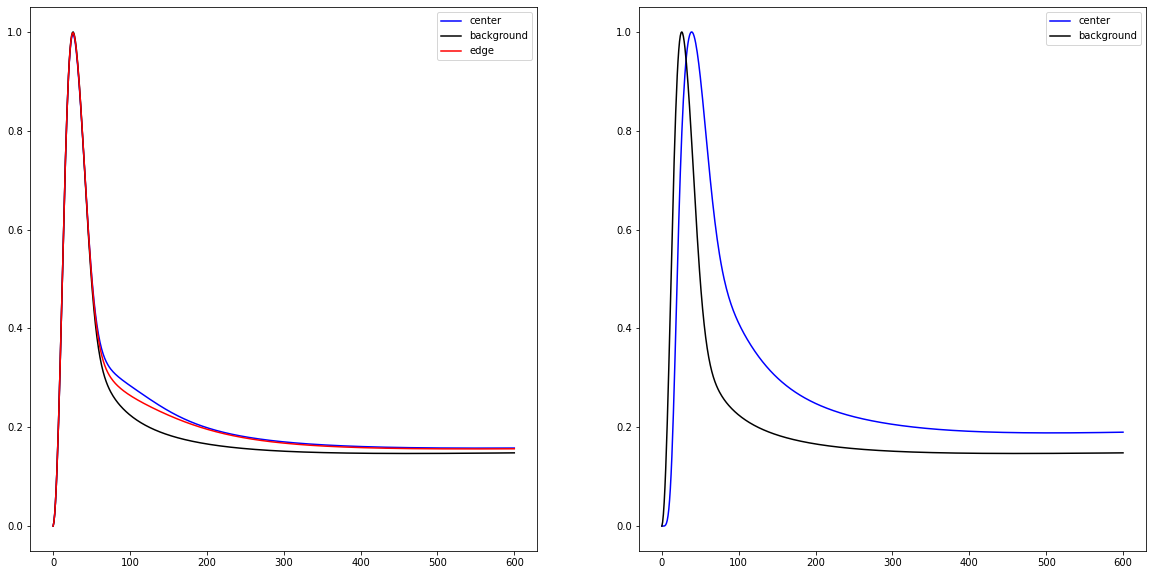

In [65]:
# _V1 = {}
# _V2={}
# _V4={}
# version = 6
# for f in range(len(model.features)):
#     preprocessing[f] = np.load(f"results{version}/preprocessing_{f}.npy")
#     _V1[f] = np.load(f"results{version}/V1_{f}.npy")
#     _V2[f] = np.load(f"results{version}/V2_{f}.npy")
#     _V4[f] = np.load(f"results{version}/V4_{f}.npy")

# preprocessing["mean"] = np.load(f"results{version}/preprocessing_mean.npy")
# _V1["mean"] = np.load(f"results{version}/V1_mean.npy")
# _V2["mean"] = np.load(f"results{version}/V2_mean.npy")
# _V4["mean"] = np.load(f"results{version}/V4_mean.npy")
# preprocessing["sum"] = np.load(f"results{version}/preprocessing_sum.npy")
# _V1["sum"] = np.load(f"results{version}/V1_sum.npy")
# _V2["sum"] = np.load(f"results{version}/V2_sum.npy")
# _V4["sum"] = np.load(f"results{version}/V4_sum.npy")


f, axs = plt.subplots(1,2, figsize=(20,10))

V1_arr = np.array(V1["mean"])

center, background, edges = extract_portions(V1_arr, inds[0], inds[-1], inds[0], inds[-1])
V1max = np.max(V1_arr)
# axs[0].imshow(center[600])
center_mean = np.mean(center, axis=(1,2))
bg_mean = np.mean([np.mean(V1_arr, axis=(1,2)) for bg in background], axis=0)
edge_mean = np.mean([np.mean(edge, axis=(1,2)) for edge in edges], axis=0)

axs[0].plot((center_mean / V1max), 'b', label='center')
axs[0].plot((bg_mean / V1max), 'k', label='background')
axs[0].plot((edge_mean / V1max), 'r', label='edge')
axs[0].legend()


V4_arr = np.array(V4["mean"])

center, background, edges = extract_portions(V4_arr, 
                                             int(inds[0]*0.5*0.25), 
                                             int(inds[0]*0.5*0.25)+1, 
                                             int(inds[-1]*0.5*0.25), 
                                             int(inds[-1]*0.5*0.25)+1)
center_mean = np.mean(center, axis=(1,2))
bg_mean = np.mean([np.mean(V1_arr, axis=(1,2)) for bg in background], axis=0)
edge_mean = np.mean([np.mean(edge, axis=(1,2)) for edge in edges], axis=0)

V4max = np.max(V4_arr)


axs[1].plot(norm(center_mean), 'b', label='center')
axs[1].plot(norm(bg_mean), 'k', label='background')
# axs[1].plot((edge_mean / V4max), 'r', label='edge')
axs[1].legend()

# V1_arr = np.array(_V1["sum"])

# center, background, edges = extract_portions(V1_arr, 48, 72, 48, 72)

# center_mean = np.mean(center, axis=(1,2))
# bg_mean = np.sum([np.mean(bg, axis=(1,2)) for bg in background], axis=0)
# edge_mean = np.sum([np.mean(edge, axis=(1,2)) for edge in edges], axis=0)

# axs[1,0].plot(norm(center_mean), 'b', label='center')
# axs[1,0].plot(norm(bg_mean), 'k', label='background')
# axs[1,0].plot(norm(edge_mean), 'r', label='edge')
# axs[1,0].legend()


# V4_arr = norm(np.array(_V4["sum"]))
# center, background, edges = extract_portions(V4_arr, 6, 9, 6, 9)
# center_mean = np.mean(center, axis=(1,2))
# bg_mean = np.mean([np.mean(bg, axis=(1,2)) for bg in background], axis=0)
# edge_mean = np.mean([np.mean(edge, axis=(1,2)) for edge in edges], axis=0)


# axs[1,1].plot(norm(center_mean), 'b', label='center')
# axs[1,1].plot(norm(bg_mean), 'k', label='background')
# axs[1,1].plot(norm(edge_mean), 'r', label='edge')
# axs[1,1].legend()

In [64]:
# int(inds[0]*0.5*0.25)
int(inds[0]*0.5*0.25)

7

In [11]:
version = "1_0"

Path(f"results{version}").mkdir(parents=True, exist_ok=True)
for f in model.features:
    np.save(f"results{version}/preprocessing_{f}.npy", preprocessing[f])
    np.save(f"results{version}/V1_{f}.npy", V1[f])
    np.save(f"results{version}/V2_{f}.npy", V2[f])
    np.save(f"results{version}/V4_{f}.npy", V4[f])

np.save(f"results{version}/preprocessing_mean.npy", preprocessing["mean"])
np.save(f"results{version}/V1_mean.npy", V1["mean"])
np.save(f"results{version}/V2_mean.npy", V2["mean"])
np.save(f"results{version}/V4_mean.npy", V4["mean"])
np.save(f"results{version}/preprocessing_sum.npy", preprocessing["sum"])
np.save(f"results{version}/V1_sum.npy", V1["sum"])
np.save(f"results{version}/V2_sum.npy", V2["sum"])
np.save(f"results{version}/V4_sum.npy", V4["sum"])

In [268]:
model.parameters["V4"]["sigma_minus"]

1

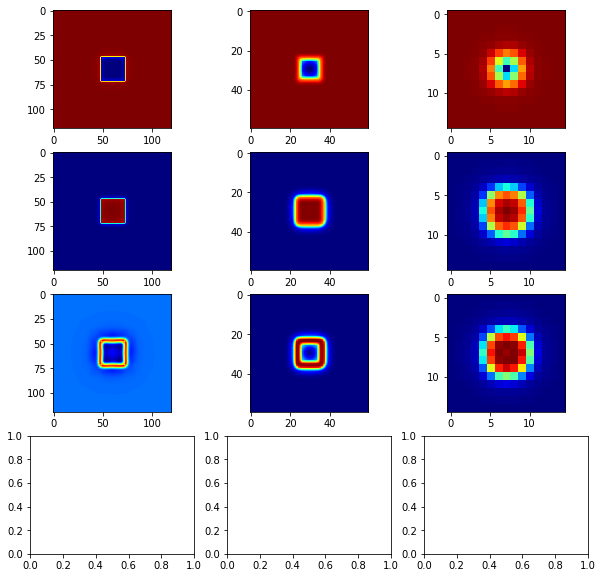

In [7]:
cmap='jet'
n=50

f, axs = plt.subplots(4,3, figsize=(10,10))
axs[0,0].imshow(preprocessing[0][n], cmap=cmap)
axs[0,0].imshow(V1[0][n], cmap=cmap)
axs[0,1].imshow(V2[0][n], cmap=cmap)
axs[0,2].imshow(V4[0][n], cmap=cmap)
axs[1,0].imshow(preprocessing[1][n], cmap=cmap)
axs[1,0].imshow(V1[1][n], cmap=cmap)
axs[1,1].imshow(V2[1][n], cmap=cmap)
axs[1,2].imshow(V4[1][n], cmap=cmap)
axs[2,0].imshow(preprocessing["mean"][n], cmap=cmap)
axs[2,0].imshow(V1["sum"][n], cmap=cmap)
axs[2,1].imshow(V2["sum"][n], cmap=cmap)
axs[2,2].imshow(V4["sum"][n], cmap=cmap)
fig.tight_layout = True

(601, 120, 120)


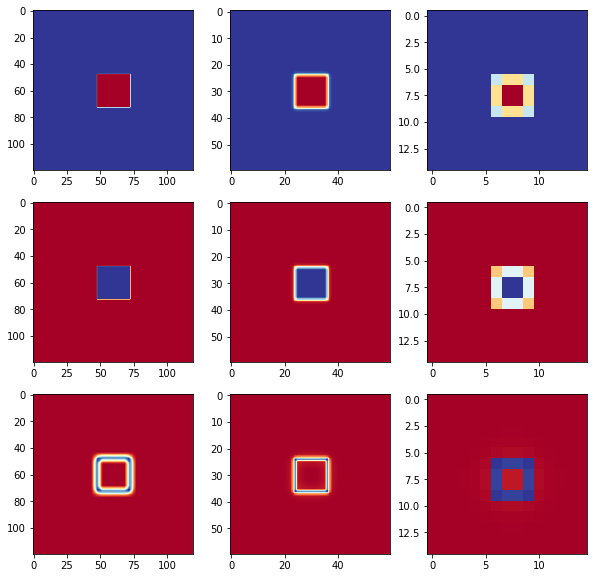

In [411]:
version = 6
for f in model.features:
    preprocessing[f] = np.load(f"results{version}/preprocessing_{f}.npy")
    V1[f] = np.load(f"results{version}/V1_{f}.npy")
    V2[f] = np.load(f"results{version}/V2_{f}.npy")
    V4[f] = np.load(f"results{version}/V4_{f}.npy")

preprocessing["mean"] = np.load(f"results{version}/preprocessing_mean.npy")
V1["mean"] = np.load(f"results{version}/V1_mean.npy")
V2["mean"] = np.load(f"results{version}/V2_mean.npy")
V4["mean"] = np.load(f"results{version}/V4_mean.npy")
preprocessing["sum"] = np.load(f"results{version}/preprocessing_sum.npy")
V1["sum"] = np.load(f"results{version}/V1_sum.npy")
V2["sum"] = np.load(f"results{version}/V2_sum.npy")
V4["sum"] = np.load(f"results{version}/V4_sum.npy")

n = 5
print(V1[0].shape)
cmap='RdYlBu'
f, axs = plt.subplots(3,3, figsize=(10,10))
# axs[0,0].imshow(preprocessing[0][n], cmap=cmap)
axs[0,0].imshow(V1[0][n], cmap=cmap)
axs[0,1].imshow(V2[0][n], cmap=cmap)
axs[0,2].imshow(V4[0][n], cmap=cmap)
# axs[1,0].imshow(preprocessing[1][n], cmap=cmap)
axs[1,0].imshow(V1[1][n], cmap=cmap)
axs[1,1].imshow(V2[1][n], cmap=cmap)
axs[1,2].imshow(V4[1][n], cmap=cmap)
# axs[2,0].imshow(preprocessing["mean"][n], cmap=cmap)
axs[2,0].imshow(V1["mean"][n], cmap=cmap)
axs[2,1].imshow(V2["mean"][n], cmap=cmap)
axs[2,2].imshow(V4["mean"][n], cmap=cmap)
fig.tight_layout = True

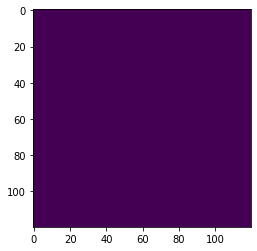

In [335]:
V1["sum"] = (np.sum( np.array([ V1[f] for f in model.features ]), axis=0 ))
V2["sum"] = (np.sum( np.array([ V2[f] for f in model.features ]), axis=0 ))
V4["sum"] = (np.sum( np.array([ V4[f] for f in model.features ]), axis=0 ))

# plt.imshow(V1["sum"][0])
x = ( np.array([ V1[f] for f in model.features ]))
x.shape
zero_true = x[1][600] + x[0][600]
plt.imshow(x[0][0])

# f, axs = plt.subplots(3,4, figsize=(10,10))
# axs[0,0].imshow(preprocessing[0][n])
# axs[0,1].imshow(V1[0][n])
# axs[0,2].imshow(V2[0][n])
# axs[0,3].imshow(V4[0][n])
# axs[1,0].imshow(preprocessing[1][n])
# axs[1,1].imshow(V1[1][n])
# axs[1,2].imshow(V2[1][n])
# axs[1,3].imshow(V4[1][n])
# axs[2,0].imshow(preprocessing["mean"][n])
# axs[2,1].imshow(V1["sum"][n])
# axs[2,2].imshow(V2["sum"][n])
# axs[2,3].imshow(V4["sum"][n])
# fig.tight_layout = True

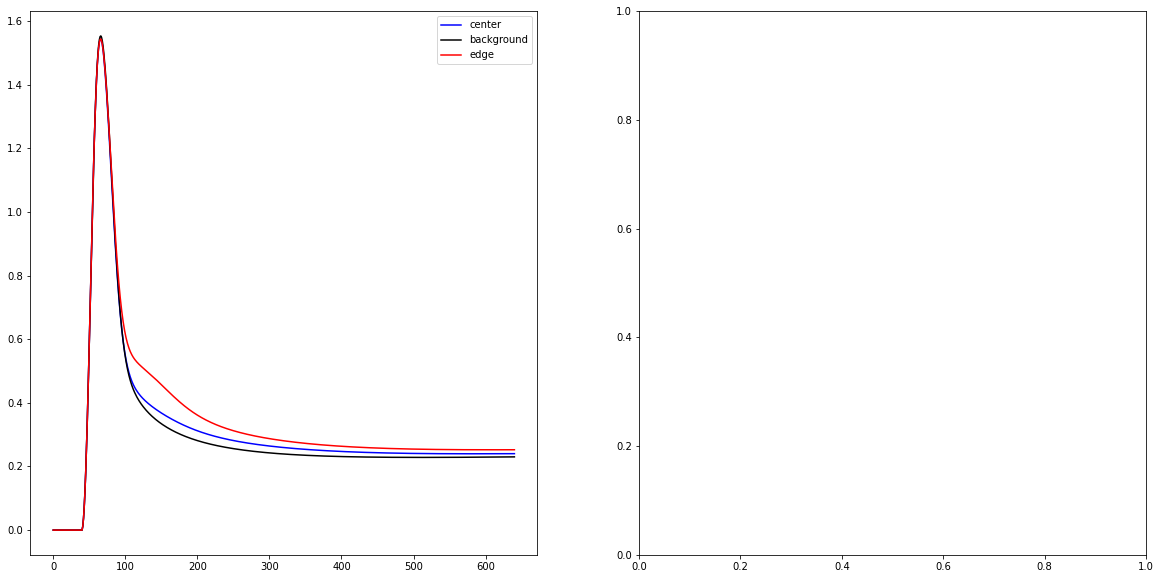

In [412]:
center = np.concatenate((np.zeros(shape=(40,24,24)), np.array(V1["mean"])[:,48:72,48:72]))
bg1 = np.concatenate((np.zeros(shape=(40,48,120)),np.array(V1["mean"])[:,:48,:]))
bg2 = np.concatenate((np.zeros(shape=(40,48,120)),  np.array(V1["mean"])[:,72:,:]))
bg3 = np.concatenate((np.zeros(shape=(40,24,48)),  np.array(V1["mean"])[:,48:72,:48]))
bg4 = np.concatenate((np.zeros(shape=(40,24,48)),  np.array(V1["mean"])[:,48:72,72:]))
edge1 = np.concatenate((np.zeros(shape=(40,1,24)),  np.array(V1["mean"])[:,47:48,48:72]))
edge2 = np.concatenate((np.zeros(shape=(40,1,24)),  np.array(V1["mean"])[:,72:73,48:72]))
edge3 = np.concatenate((np.zeros(shape=(40,24,1)),  np.array(V1["mean"])[:,48:72,47:48]))
edge4 = np.concatenate((np.zeros(shape=(40,24,1)),  np.array(V1["mean"])[:,48:72,71:72]))


center_mean = np.mean(center, axis=(1,2))
bg_mean = (np.mean(bg1, axis=(1,2)) + np.mean(bg2, axis=(1,2)) + np.mean(bg3, axis=(1,2)) + np.mean(bg4, axis=(1,2))) / 4
edge_mean = (np.mean(edge1, axis=(1,2)) + np.mean(edge2, axis=(1,2)) + np.mean(edge3, axis=(1,2)) + np.mean(edge4, axis=(1,2))) / 4

f, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].plot((center_mean), 'b', label='center')
axs[0].plot((bg_mean) , 'k', label='background')
axs[0].plot((edge_mean) , 'r', label='edge')
axs[0].legend()

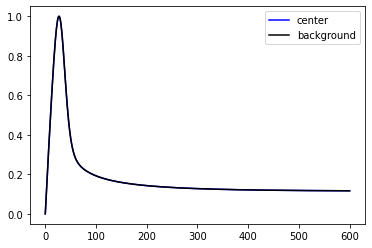

In [138]:
center = np.pad(np.array(preprocessing["mean"])[:,48:72,48:72], [(0,0),(48,48),(48,48)])
bg = np.array(preprocessing["mean"]) - center
center_mean = np.mean(center, axis=(1,2))
bg_mean = np.mean(bg, axis=(1,2))
plt.plot(center_mean / np.linalg.norm(center_mean, np.inf), 'b', label='center')
plt.plot(bg_mean / np.linalg.norm(bg_mean, np.inf), 'k', label='background')
plt.legend()

1.0
1.0
0.9997735753647319
[[0.22 0.22 0.22]
 [0.22 0.22 0.23]
 [0.22 0.23 0.23]]
0.13009864879441624
0.17868100221175698


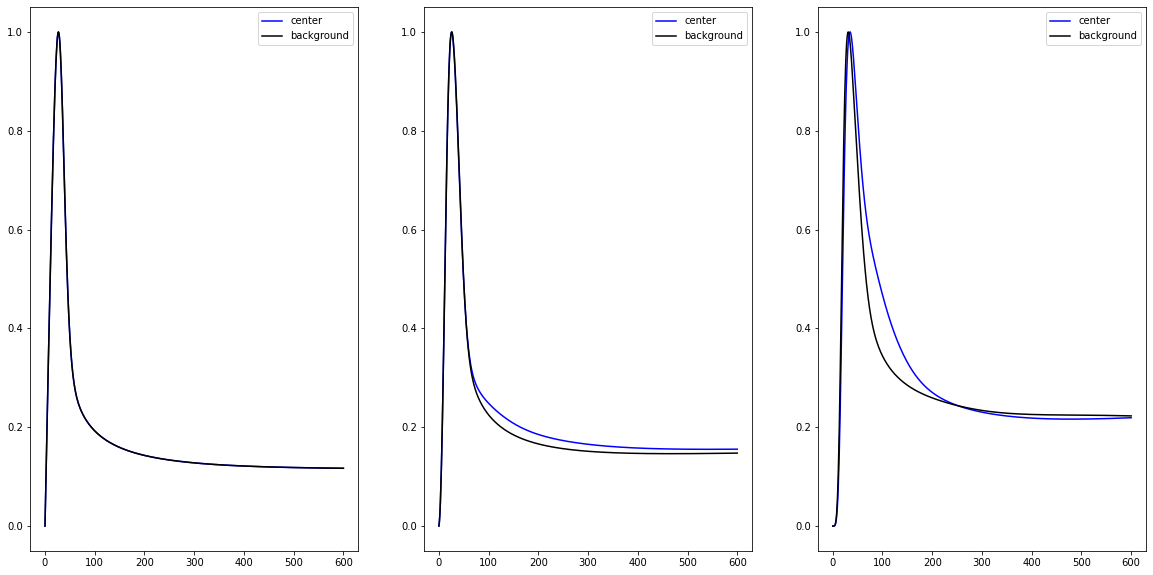

In [312]:
# plt.imshow(V4["mean"][600])
center = np.pad(np.array(preprocessing["mean"])[:,48:72,48:72], [(0,0),(48,48),(48,48)])
bg = np.array(preprocessing["mean"]) - center

# center = np.pad(np.array(V2["mean"])[:,23:37,23:37], [(0,0),(23,23),(23,23)])
# bg = np.array(V2["mean"]) - center
# bg1 = np.array(V4["mean"])[:,:5,:]
# bg2 = np.array(V4["mean"])[:,10:,:]
# bg3 = np.array(V4["mean"])[:,5:10,:5]
# bg4 = np.array(V4["mean"])[:,5:10,10:]
# edge1 = np.array(V4["mean"])[:,9:6,6:72]
# edge2 = np.array(V4["mean"])[:,72:73,6:72]
# edge3 = np.array(V4["mean"])[:,6:72,47:6]
# edge4 = np.array(V4["mean"])[:,6:72,71:72]
# center = np.pad(np.array(V4["mean"])[:,6:9,6:9], [(0,0),(6,6),(6,6)])
# np.mean(np.array(V1["mean"]), axis=(1,2)).shape
# center = np.pad(np.array(V1["mean"])[:,48:72,48:72], [(0,0),(48,48),(48,48)])
# bg = np.array(V1["mean"]) - center
# edge1 = np.pad(np.array(V1["mean"])[:,47:48,48:72], [(0,0),(48,71),(48,48)])
# edge2 = np.pad(np.array(V1["mean"])[:,72:73,48:72], [(0,0),(71,48),(48,48)])
# edge3 = np.pad(np.array(V1["mean"])[:,48:72,47:48], [(0,0),(48,48),(48,71)])
# edge4 = np.pad(np.array(V1["mean"])[:,48:72,71:72], [(0,0),(48,48),(71,48)])
# plt.imshow(edge1[100]+edge2[100]+edge3[100]+ edge4[100])

f, axs = plt.subplots(1,3, figsize=(20,10))

center = np.pad(np.array(preprocessing["mean"])[:,48:72,48:72], [(0,0),(48,48),(48,48)])
bg = np.array(preprocessing["mean"]) - center
center_mean = np.mean(center, axis=(1,2))
bg_mean = np.mean(bg, axis=(1,2))#np.mean([np.mean(bg1, axis=(1,2)),np.mean(bg2, axis=(1,2)), np.mean(bg3, axis=(1,2)), np.mean(bg4, axis=(1,2))], axis=0)
# # edge_mean = np.mean(edge1, axis=(1,2)) + np.mean(edge2, axis=(1,2)) + np.mean(edge3, axis=(1,2)) + np.mean(edge4, axis=(1,2))
# print(np.linalg.norm(center_mean, np.inf))
axs[0].plot(center_mean / np.linalg.norm(center_mean, np.inf), 'b', label='center')
axs[0].plot(bg_mean / np.linalg.norm(bg_mean, np.inf), 'k', label='background')
axs[0].legend()
# # plt.plot(edge_mean / np.linalg.norm(edge_mean, np.inf), 'r', label='edge')
center = np.pad(np.array(V1["sum"])[:,48:72,48:72], [(0,0),(48,48),(48,48)])
bg = np.array(V1["sum"]) - center
center_mean = np.mean(center, axis=(1,2))
bg_mean = np.mean(bg, axis=(1,2))
axs[1].plot(center_mean / np.linalg.norm(center_mean, np.inf), 'b', label='center')
axs[1].plot(bg_mean / np.linalg.norm(bg_mean, np.inf), 'k', label='background')
axs[1].legend()

np.set_printoptions(precision=2)
arr = norm(np.array(V4["sum"]))
print(np.max(arr))
center = np.pad(arr[:,6:9,6:9], [(0,0),(6,6),(6,6)])
print(np.max(center))
bg = arr - center
print(np.max(bg))
center = arr[:,6:9,6:9]
print(center[200])
# print(bg[200])
# print(arr[200])
# print(np.mean(bg[400]))
# print(np.mean(center[400]))
# axs[3].imshow(bg[200],  cmap=cmap)
# axs[4].imshow(arr[200], cmap=cmap)
center_mean = np.mean(center, axis=(1,2))
bg_mean = np.mean(bg, axis=(1,2))
print(bg_mean[400])
print(center_mean[400])

# print(np.max(np.sum(np.abs(center_mean))))
# print(np.argwhere(np.max(center, axis=(1,2)) == 0))
axs[2].plot(norm(center_mean), 'b', label='center')
axs[2].plot(norm(bg_mean), 'k', label='background')
axs[2].legend()

In [220]:
def norm(x):
    return (x-np.min(x)) / (np.max(x) - np.min(x))

In [199]:
x = np.linspace(-5,8,16)
x = np.reshape(x,(4,4))

mask = [False for _ in range(16)]
mask = np.reshape(mask, (4,4))
mask[[[1],[2]],[1,2]] = True

ma = np.ma.MaskedArray(x, mask)
print(np.sum(ma))
print(np.sum(x))
print(ma)
print(x)
print(mask[[[1],[2]],[1,2]])

18.000000000000004
24.000000000000004
[[-5.0 -4.133333333333333 -3.2666666666666666 -2.4]
 [-1.5333333333333332 -- -- 1.0666666666666664]
 [1.9333333333333336 -- -- 4.533333333333333]
 [5.4 6.2666666666666675 7.133333333333333 8.0]]
[[-5.  -4.1 -3.3 -2.4]
 [-1.5 -0.7  0.2  1.1]
 [ 1.9  2.8  3.7  4.5]
 [ 5.4  6.3  7.1  8. ]]
[[ True  True]
 [ True  True]]


0


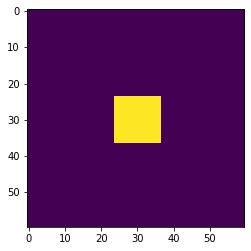

In [40]:
V1_V2_ff_space = np.arange(0, 120, 2)
Y, X = np.meshgrid(V1_V2_ff_space, V1_V2_ff_space)

f = lambda x,y: na[x,y]

plt.imshow(f(X,Y))
print(f(X,Y)[37,37])

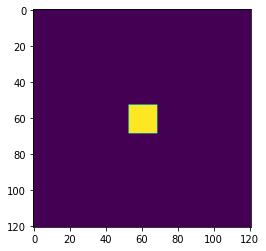

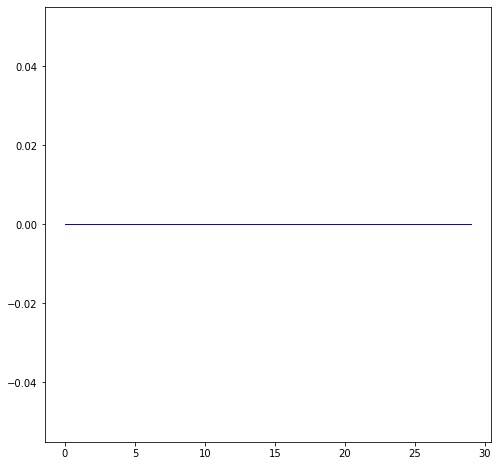

In [2]:
model = Model(dict(), [0, 1], input_dim=121)
# na = np.zeros(shape=(121,121))
# na[80:121, 50:121] = 1
na = generate_block(figure_dim = 16)
# na = np.transpose(na)
# print(model)

plt.imshow(na)
some_cell_v = []
some_cell_w = []
for _ in range(30):
#     print(model.preprocessing_stage[1][1][1].v)
    some_cell_v.append(model.preprocessing_stage[1].V[2,6])
    some_cell_w.append(model.preprocessing_stage[1].W[2,6])
    model.update(na, 10e-3)

plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.plot(np.arange(0,30,1), some_cell_v, 'b-', label="v", linewidth=1)


activity = 0.0008184076893516031
activity = 0.0008184076893517529


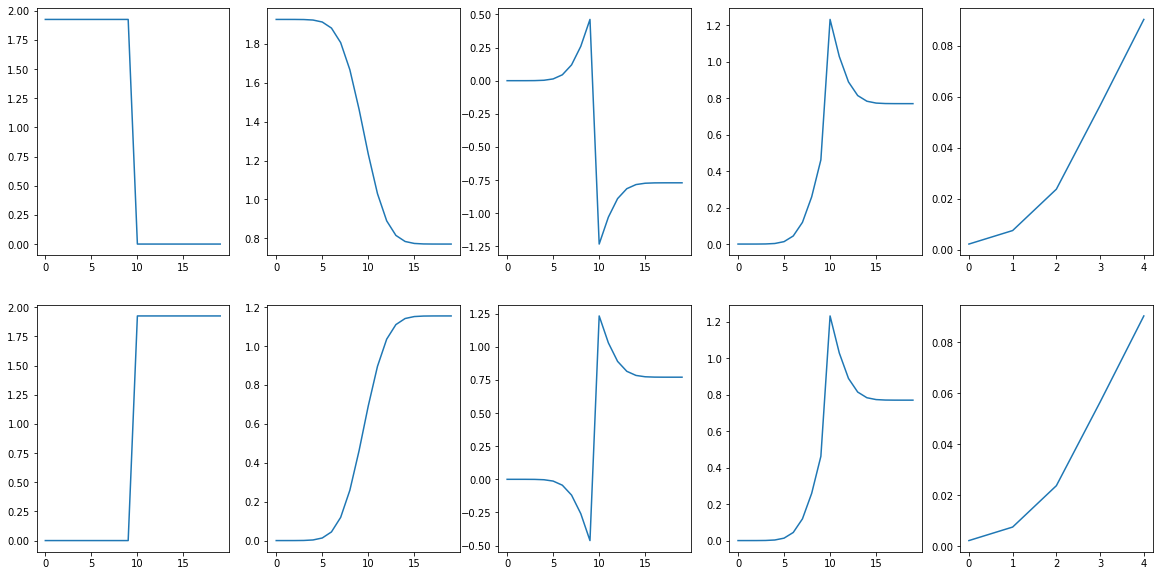

In [80]:
fig, axs = plt.subplots(2,5, figsize=(20,10))
for f in range(2):
    space_1D = model.preprocessing_stage[f].V[70:90, 70:90]
    space_1D_gauss = ndimage.gaussian_filter(space_1D, 2)
    axs[f, 0].plot(space_1D[:,10])
    axs[f, 1].plot(space_1D_gauss[:,10])
    axs[f, 2].plot((space_1D[:,10] - space_1D_gauss[:,10]))
    axs[f, 3].plot(np.abs(space_1D[:,10] - space_1D_gauss[:,10]))
#     axs[f, 4].imshow((np.abs(space_1D - space_1D_gauss)[2:7,2:7]))
    axs[f, 4].plot((ndimage.gaussian_filter(np.abs(space_1D[:,10] - space_1D_gauss[:,10])[3:8], 1)))
    print(f"activity = {(ndimage.gaussian_filter(np.abs(space_1D - space_1D_gauss)[3:8,3:8], 1))[2,2]}")

[[1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]]


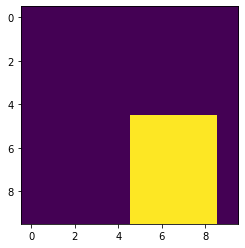

In [347]:
def extract_window(activity_map: np.ndarray, x: int, y: int, support: float):
    if x >= activity_map.shape[0] or y >= activity_map.shape[1]:
        raise Exception("Out of bounds")
#     activity_map = deepcopy(activity_map)
    support = support // 2
#     print(support)
#     f, axs = plt.subplots(1,3,figsize=(20,10))
    # add columns (or rows) if on the edge
    if y < support:
#         axs[0].imshow(activity_map)
        activity_map = np.concatenate((np.repeat(activity_map[:, 0][:, np.newaxis], support - y, axis=1), activity_map),
                                      axis=1)
        y = support
#         axs[1].imshow(activity_map)
        
    elif y >= activity_map.shape[1] - support:
#         print(activity_map.shape)
#         axs[0].imshow(activity_map)
#         print(y + support - activity_map.shape[1] + 1)
        activity_map = np.concatenate(
            (activity_map, np.repeat(activity_map[:, -1][:, np.newaxis], y + support - activity_map.shape[1] + 1, axis=1)),
            axis=1)
#         y = activity_map.shape[1] - support
#         axs[1].imshow(activity_map)

    if x < support:
        activity_map = np.concatenate((np.repeat(activity_map[0, :][np.newaxis, :], support - x, axis=0), activity_map),
                                      axis=0)
        x = support
#         print(activity_map.shape)
#         axs[2].imshow(activity_map)

    elif x >= activity_map.shape[0] - support - 1:
        activity_map = np.concatenate(
            (activity_map, np.repeat(activity_map[-1, :][np.newaxis, :], x + support - activity_map.shape[0] + 1, axis=0)),
            axis=0)
#         x = activity_map.shape[0] - support
#         axs[2].imshow(activity_map)
        
    
#     print(x - support, x + support + 1, y - support, y + support + 1)
        
    window = activity_map[x - support: x + support + 1, y - support: y + support + 1]
#     print(activity_map[x - support: x + support + 1, y - support:].shape)
    return window


x = np.zeros(shape=(10,10))
x[5:10,5:9] = 1
print(extract_window(x, 9, 9, 5))
print(x[5:10, 5:10])
plt.imshow(x)

[[0.003 0.013 0.022 0.013 0.003]
 [0.013 0.059 0.097 0.059 0.013]
 [0.022 0.097 0.159 0.097 0.022]
 [0.013 0.059 0.097 0.059 0.013]
 [0.003 0.013 0.022 0.013 0.003]]


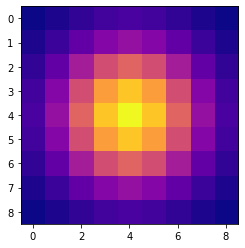

In [4]:
import math
cmap = 'plasma'
np.set_printoptions(precision=3)
def receptive_field_activity(x: int, y: int, kernel: np.ndarray, activity_map: np.ndarray):
    window = extract_window(activity_map, x, y, kernel.shape[0])
#     ax.imshow(window*kernel)
    return np.sum(window * kernel)
#     return np.max(ndimage.gaussian_filter(window, sigma))#[support // 2, support // 2]
#     return window[support // 2, support // 2]


def fb_activity(x: int, y: int, support: float, sigma: float, activity_map: np.ndarray):
    window = extract_window(activity_map, x, y, support)
    return np.sum(window)
#     return np.max(ndimage.gaussian_filter(window, sigma))#[support // 2, support // 2]
#     return window[support // 2, support // 2]

def gaussian(x: int, y: float, sigma: float):
    return np.exp(-((x)**2 + (y)**2)/(2*sigma**2)) /(2*np.pi*sigma**2)

# def gaussian(x: int, y: float, sigma: float):
#     hg = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
#     return hg / np.sum(hg)

def kernel(support: int, sigma: float):
    space_1D = np.linspace(-(support//2), support//2, support)
    X, Y = np.meshgrid(space_1D, space_1D)
    return gaussian(X, Y, sigma=sigma)
plt.imshow(kernel(9,2),cmap=cmap)
print(kernel(5,1))

def gaussian_1d(x: np.ndarray, mu: float, sigma: float, normalize: bool = False):
    hg = np.exp(-((x-mu) ** 2) / (2 * sigma ** 2))
    if normalize:
        return hg / np.sum(hg)
    else:
        return hg

0.50858366
[[0.001 0.004 0.007 0.004 0.001]
 [0.004 0.02  0.032 0.02  0.004]
 [0.007 0.032 0.053 0.032 0.007]
 [0.004 0.02  0.032 0.02  0.004]
 [0.001 0.004 0.007 0.004 0.001]]


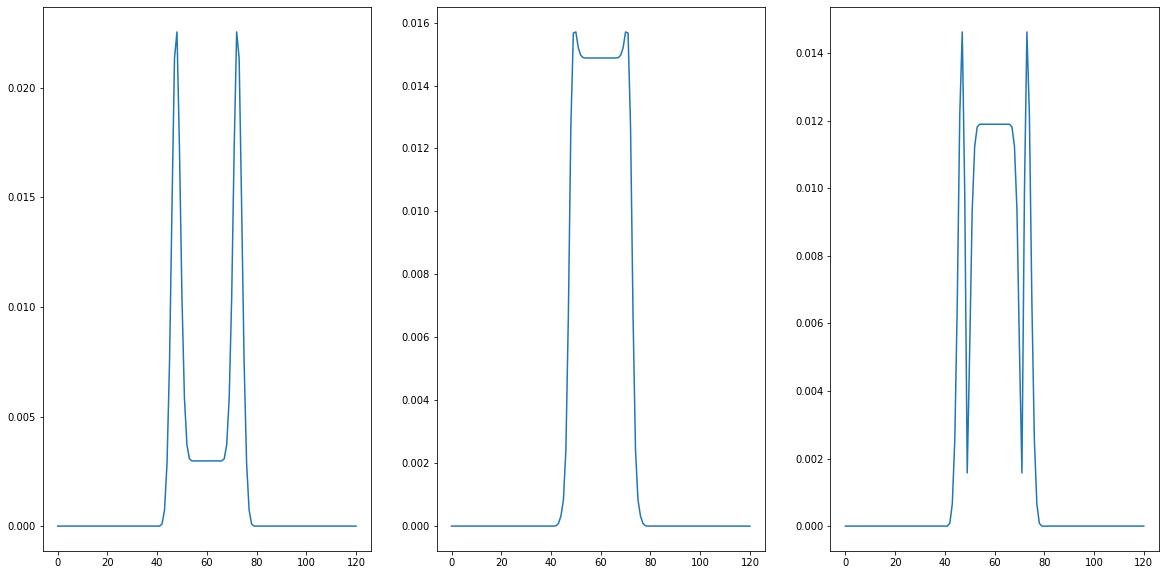

In [67]:
na = generate_block(bg_orientation = 45, figure_orientation=135)
# na2 = generate_block(bg_orientation = 130, figure_orientation=135)
# ga = gaussian_1d(na, 135, 10)
# gboundary = 1/15 * ndimage.correlate(abs(ga-ndimage.correlate(ga, kernel(9,2), mode='nearest')), \
#                                       kernel(5,1), mode='nearest')

a = np.ones_like(na) * (na == 135)
# b = np.ones_like(na2) * (na2 == 135)
boundary = 1/15 * ndimage.correlate(abs(a-ndimage.correlate(a, kernel(9,2), mode='nearest')), \
                                      kernel(5,1), mode='nearest')

gboundary = 1/15 * ndimage.correlate(abs(a-ndimage.correlate(a, 1/3*kernel(9,2), mode='nearest')), \
                                      1/3*kernel(5,1), mode='nearest')

# boundary2 = 1/15 * ndimage.correlate(abs(b-ndimage.correlate(b, kernel(9,2), mode='nearest')), \
#                                       kernel(5,1), mode='nearest')

fig, axs = plt.subplots(1,3, figsize = (20,10))
# axs[0].imshow(a,cmap=cmap)
# axs[1].imshow(gboundary, cmap=cmap)
# axs[2].imshow(np.abs(boundary - gboundary), cmap=cmap)

print(np.sum(boundary - gboundary))
print(1/3*kernel(5,1))

axs[0].plot(boundary[60,:])
axs[1].plot(gboundary[60,:])
axs[2].plot(np.abs(boundary - gboundary)[60,:])

In [69]:
interpolate.interp2d()
# First step - scale the kernel relative to similarity. Just send through. +ve and -ve same paramter to start 

scipy.interpolate._interpolate.interp2d

In [5]:
kernel(5,1)

array([[0.003, 0.013, 0.022, 0.013, 0.003],
       [0.013, 0.059, 0.097, 0.059, 0.013],
       [0.022, 0.097, 0.159, 0.097, 0.022],
       [0.013, 0.059, 0.097, 0.059, 0.013],
       [0.003, 0.013, 0.022, 0.013, 0.003]])

In [428]:
X, Y = np.meshgrid(np.linspace(-1,+1,120), np.linspace(-1,+1,120))
X

array([[-1.   , -0.983, -0.966, ...,  0.966,  0.983,  1.   ],
       [-1.   , -0.983, -0.966, ...,  0.966,  0.983,  1.   ],
       [-1.   , -0.983, -0.966, ...,  0.966,  0.983,  1.   ],
       ...,
       [-1.   , -0.983, -0.966, ...,  0.966,  0.983,  1.   ],
       [-1.   , -0.983, -0.966, ...,  0.966,  0.983,  1.   ],
       [-1.   , -0.983, -0.966, ...,  0.966,  0.983,  1.   ]])

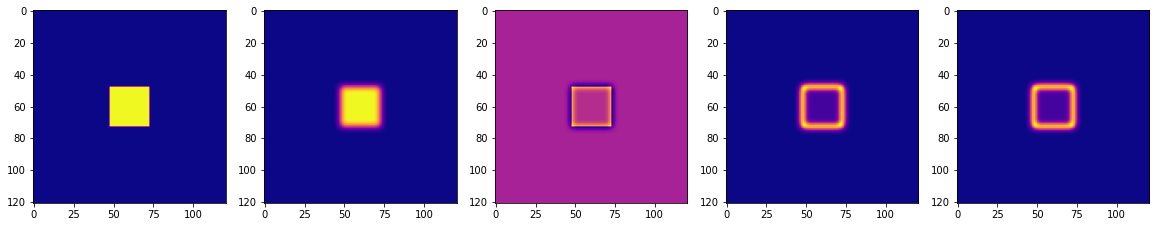

In [36]:
cmap = 'plasma'
# def boundary_detection_activity(x, y):
#     return 1/15 * ndimage.correlate()
#     minus_supp = 9 // 2
#     plus_supp = 5 // 2
#     new_v = deepcopy(rfs)
    
#     window = extract_window(new_v, x, y, 9)
#     smooth = ndimage.gaussian_filter(window, 2)
#     raw_activity = np.abs(window - smooth)
#     return ndimage.gaussian_filter(extract_window(raw_activity, minus_supp, minus_supp, 5), 1)[2,2]

#     return ndimage.gaussian_filter(raw_activity[minus_supp-plus_supp:minus_supp+plus_supp+1, minus_supp-plus_supp:minus_supp+plus_supp+1], 2)[2,2]
#     return raw_activity[minus_supp-plus_supp:minus_supp+plus_supp+1, minus_supp-plus_supp:minus_supp+plus_supp+1][2,2]

# 1/15*imfilter(abs(opt.Gin-imfilter(opt.Gin, LambdaSur, 'same', 'replicate')), ...
#        LambdaExc, 'same', 'replicate').*(V - 35);
# vb = np.vectorize(boundary_detection_activity)
na = generate_block()
# na = np.full_like(na, 90)
# na[15:25, 15:25] = 60
# na[96:106, 96:106] = 30
sigma = 30
mu = 60
hg = np.exp(-((na-mu) ** 2) / (2 * sigma ** 2))
activity = hg
fig, axs = plt.subplots(1,5, figsize=(20,10))
axs[0].imshow(activity, cmap=cmap)
space = np.arange(0,121)
Y, X = np.meshgrid(space, space)
                                      
# res = vb(X,Y)
conv_1 = np.vectorize(partial(receptive_field_activity, activity_map=activity, kernel=kernel(9,2)))
res = conv_1(X,Y)
axs[1].imshow(res, cmap=cmap)
raw_activity = np.abs(activity - res)
axs[2].imshow(raw_activity, cmap=cmap)
conv_2 = np.vectorize(partial(receptive_field_activity, activity_map=raw_activity, kernel=kernel(5,1)))
res = conv_2(X,Y)


boundary = 1/15 * ndimage.correlate(abs(na-ndimage.correlate(na, kernel(9,2), mode='nearest')), \
                                      kernel(5,1), mode='nearest')
axs[3].imshow(boundary, cmap=cmap)
boundary = 1/15 * ndimage.correlate(abs(na-ndimage.correlate(na, kernel(9,2), mode='nearest')), \
                                      kernel(5,1), mode='nearest')
axs[4].imshow(boundary, cmap=cmap)
# V1_X, V1_Y = np.meshgrid(np.linspace(-1,1,121), np.linspace(-1,1,121))
# V2_X, V2_Y = np.meshgrid(np.linspace(-1,1,61), np.linspace(-1,1,61))
# V2V = interpolate.griddata((V1_X.ravel(), V1_Y.ravel()), boundary.ravel(), (V2_X.ravel(),V2_Y.ravel())).reshape(V2_X.shape)
# boundary = 1/15 * ndimage.correlate(abs(V2V-ndimage.correlate(V2V, kernel(9,2), mode='nearest')), \
#                                       kernel(5,1), mode='nearest')
# V1_2V = interpolate.griddata((V2_X.ravel(), V2_Y.ravel()), boundary.ravel(), (V1_X.ravel(),V1_Y.ravel())).reshape(V1_X.shape)
# axs[3].imshow(ndimage.correlate(V2V, kernel(5,1), mode='nearest'), cmap=cmap)
# axs[4].imshow(ndimage.correlate(V1_2V, kernel(5,1), mode='nearest'), cmap=cmap)
# print(ndimage.correlate(activity, kernel(5,1), mode='nearest')[45:60,45:60])
# activity[45:70,45:70]
# axs[4].imshow(activity)

In [32]:
4*1.65

6.6

In [34]:
print(hg[96:106, 96:106])
print(hg[85:95, 85:95])

[[0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]]
[[0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607]
 [0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.607 0.60

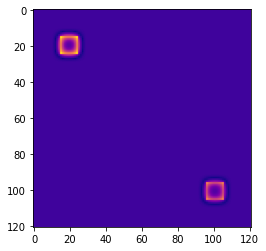

In [20]:
plt.imshow(boundary, cmap = cmap)

In [37]:
x = []
x.append(np.array([[0,0,0],[1,1,1],[2,2,2]]))
x.append(np.array([[1,1,1],[0,0,0],[1,1,1]]))
print(x)
np.mean( np.array([ x[f] for f in range(2)]), axis=0 )

[array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]]), array([[1, 1, 1],
       [0, 0, 0],
       [1, 1, 1]])]


array([[0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5],
       [1.5, 1.5, 1.5]])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.

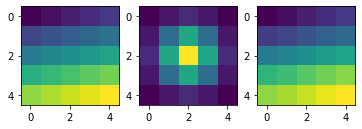

In [7]:
input_img = np.linspace(-1,1,25).reshape(5,5)
f, axs = plt.subplots(1,3)
axs[0].imshow(input_img)
axs[1].imshow(kernel(5,1))
axs[2].imshow(ndimage.correlate(input_img, kernel(5,1), mode='nearest'))
print(activity[48:72, 48:72])
print(ndimage.correlate(activity, kernel(5,1))[48:72, 48:72])


[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 56 60]


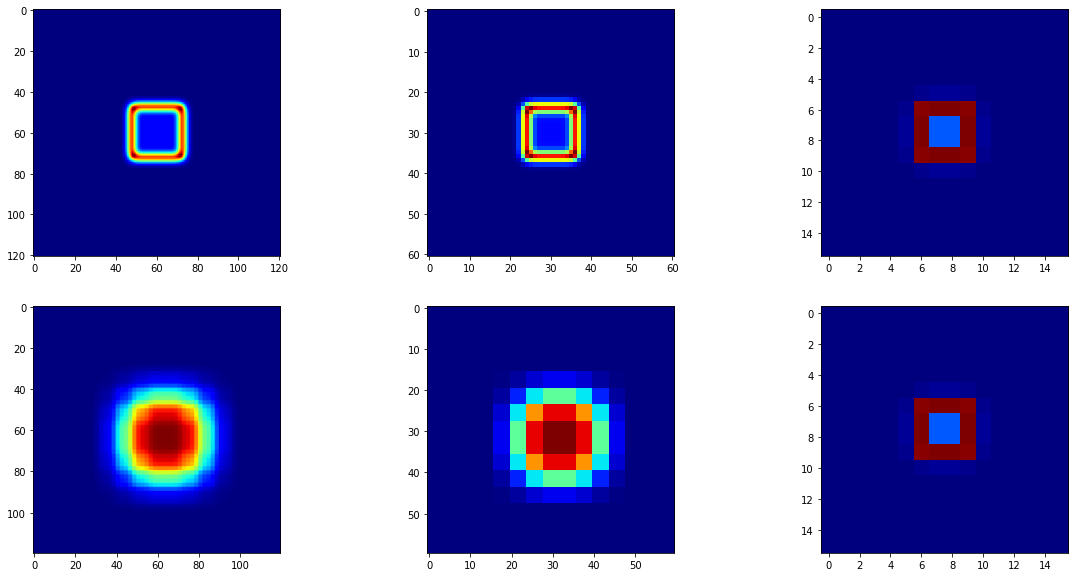

In [408]:
cmap='jet'
support = 5
sigma = 1
space_1D = np.linspace(-(support//2), support//2, support, endpoint=True)
X, Y = np.meshgrid(space_1D, space_1D)
space = np.arange(0, 121, 2)
_Y, _X = np.meshgrid(space, space)
f, axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].imshow(res, cmap=cmap)
v_rf_v1 = np.vectorize(partial(receptive_field_activity, activity_map=res, kernel=kernel(5,1)))
rfs = v_rf_v1(_X,_Y)
axs[0,1].imshow(rfs, cmap=cmap)
v_rf_v1 = np.vectorize(partial(receptive_field_activity, activity_map=rfs, kernel=kernel(5,1)))
space = np.arange(0, 61, 4)
print(space)
_Y, _X = np.meshgrid(space, space)
rfs = v_rf_v1(_X,_Y)
# rfs = ndimage.gaussian_filter(v_rf_v1(_X,_Y), 1)
axs[0,2].imshow(rfs, cmap=cmap)

axs[1,2].imshow(rfs, cmap=cmap)
v_rf_v1 = np.vectorize(partial(receptive_field_activity, activity_map=rfs, kernel=kernel(5,1)))
space = np.arange(0, 15)
_Y, _X = np.meshgrid(space, space)
rfs = v_rf_v1(_X,_Y)
rfs = np.repeat(rfs,4, axis=0)
rfs = np.repeat(rfs,4, axis=1)
axs[1,1].imshow(rfs, cmap=cmap)

v_rf_v1 = np.vectorize(partial(receptive_field_activity, activity_map=rfs, kernel=kernel(5,1)))
space = np.arange(0, 60)
_Y, _X = np.meshgrid(space, space)
rfs = v_rf_v1(_X,_Y)
rfs = np.repeat(rfs,2, axis=0)
rfs = np.repeat(rfs,2, axis=1)
axs[1,0].imshow(rfs, cmap=cmap)
f.itght_layout = True

In [26]:
df = pd.DataFrame({"V1": [1,2,3,4,5,6,7], "V2": [1,2,3,4,5,6,7], "V4": [1,2,3,4,5,6,7]}, index=["e1","e2","e3","e4","e5","e6","e7"])
df["V1"]

e1    1
e2    2
e3    3
e4    4
e5    5
e6    6
e7    7
Name: V1, dtype: int64

In [362]:
1000 * 1e-3


1.0

In [360]:
def runge_kutta2_step(f, x,y, t, h):
    k1 = h * f(x,y, t)
    k2 = h * f(x + k1, t + h)

    # Update next value of y
    return x + (k1 + k2) / 2

# model.preprocessing_stage[0].V, model.preprocessing_stage[0].V,
f= partial(model.V1[0].V.update(timestep=1e-3))
runge_kutta2_step(f,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
def gauss2D_iso_cart(x, y, mu=(0.0, 0.0), sigma=1.0, normalize_RFs=False):
    """gauss2D_iso_cart
    gauss2D_iso_cart takes two-dimensional arrays x and y, containing
    the x and y coordinates at which to evaluate the 2D isotropic gaussian 
    function, with a given sigma, and returns a 2D array of Z values.
    Parameters
    ----------
    x : numpy.ndarray, 2D or flattened by masking
        2D, containing x coordinates
    y : numpy.ndarray, 2D or flattened by masking
        2D, containing y coordinates
    mu : tuple, optional
        mean, 2D coordinates of mean/mode of gauss (the default is (0.0,0.0))
    sigma : float, optional
        standard deviation of gauss (the default is 1.0)
    Returns 
    -------
    numpy.ndarray, 2D or flattened by masking
        gaussian values evaluated at (x,y)
    """
    if normalize_RFs:
        return np.exp(-((x-mu[0])**2 + (y-mu[1])**2)/(2*sigma**2)) /(2*np.pi*sigma**2)
    else:
        return np.exp(-((x-mu[0])**2 + (y-mu[1])**2)/(2*sigma**2))

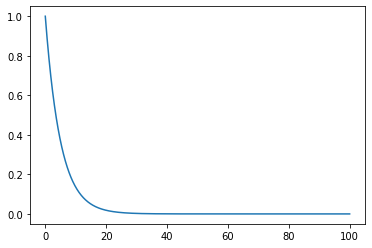